# E-Commerce Purchase Prediction 

### **Problem Statement**  
In the competitive landscape of e-commerce, understanding user behavior and predicting purchase intent is crucial for improving customer experience and driving sales. The goal of this project is to develop a machine learning model that predicts whether a user will purchase a product based on various user attributes, product details, and interaction features.  

By accurately predicting purchase behavior, the model aims to:  
- Help businesses personalize recommendations.  
- Optimize marketing strategies by identifying potential buyers.  
- Improve inventory management by forecasting product demand.  
- Enhance customer retention efforts by targeting users likely to make a purchase.  

The solution will leverage a dataset containing 60,000 records and 50+ features, ensuring comprehensive analysis and model development.

# Importing Libraries

In [267]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PowerTransformer
from scipy.stats import skew
from scipy.stats.mstats import winsorize
from scipy.stats.mstats import winsorize
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, classification_report, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

#### Import the CSV Data as Pandas DataFrame

In [268]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\Learnbay_Project\Dataset\ecommerce_recommendation_dataset.csv")

### Data preprocessing

#### shows first 5 data

In [269]:
df.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,0.13,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.02,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,1.55,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,1.41,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,1.29,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66


In [270]:
df[df.columns[10:31]].head(3)

,time_on_page,add_to_cart_count,search_keywords,discount_applied,user_membership,user_browser,user_device,purchase_time,session_duration,clicks_on_ads,...,referral_source,wishlist_additions,cart_abandonment_rate,average_spent,user_income,user_education,user_marital_status,product_availability,stock_status,product_return_rate
0,13.86,6,Table,False,Free,Safari,Desktop,2024-08-16 10:00:00,2432.93,12,...,Email,5,0.87,1679.10,42898.60,Master's,Divorced,Pre-order,High,0.32
1,13.03,3,Laptop,True,Silver,Safari,Tablet,2024-07-16 23:00:00,407.26,6,...,Search Engine,12,0.97,1281.47,29088.27,PhD,Widowed,In Stock,Low,0.20
2,3.75,7,Table,False,Gold,Safari,Tablet,2024-09-27 15:00:00,3018.87,15,...,Direct,6,0.44,452.02,86861.37,Master's,Widowed,In Stock,High,0.08


#### Shape of the dataset

In [271]:
df.shape

(60000, 51)

#### Check datatypes

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  60000 non-null  int64  
 1   product_id               60000 non-null  int64  
 2   category                 60000 non-null  object 
 3   price                    60000 non-null  float64
 4   rating                   60000 non-null  int64  
 5   review_count             60000 non-null  int64  
 6   user_age                 60000 non-null  int64  
 7   user_gender              60000 non-null  object 
 8   user_location            60000 non-null  object 
 9   purchase_history         60000 non-null  bool   
 10  time_on_page             60000 non-null  float64
 11  add_to_cart_count        60000 non-null  int64  
 12  search_keywords          60000 non-null  object 
 13  discount_applied         60000 non-null  bool   
 14  user_membership       

#### Checks missing Values

In [273]:
df.isna().sum()

user_id                    0
product_id                 0
category                   0
price                      0
rating                     0
review_count               0
user_age                   0
user_gender                0
user_location              0
purchase_history           0
time_on_page               0
add_to_cart_count          0
search_keywords            0
discount_applied           0
user_membership            0
user_browser               0
user_device                0
purchase_time              0
session_duration           0
clicks_on_ads              0
page_views                 0
referral_source            0
wishlist_additions         0
cart_abandonment_rate      0
average_spent              0
user_income                0
user_education             0
user_marital_status        0
product_availability       0
stock_status               0
product_return_rate        0
product_color              0
product_size               0
is_top_seller              0
discount_perce

- There is no missing values in the dataset

#### Checking the number of unique values of each column

In [274]:
df.nunique()

user_id                    45154
product_id                  4999
category                       5
price                      45014
rating                         5
review_count                 500
user_age                      52
user_gender                    3
user_location                  3
purchase_history               2
time_on_page                2951
add_to_cart_count             10
search_keywords                5
discount_applied               2
user_membership                4
user_browser                   4
user_device                    3
purchase_time               8749
session_duration           55235
clicks_on_ads                 20
page_views                    99
referral_source                4
wishlist_additions            20
cart_abandonment_rate        101
average_spent              56634
user_income                59912
user_education                 4
user_marital_status            4
product_availability           3
stock_status                   3
product_re

- The dataset contains several features with a high number of unique values

#### Statistical summary of numerical columns

In [275]:
df.describe()

,user_id,product_id,price,rating,review_count,user_age,time_on_page,add_to_cart_count,session_duration,clicks_on_ads,...,time_to_purchase,delivery_time,shipping_fee,seller_rating,seller_response_time,product_rating_variance,review_sentiment_score,user_engagement_score,ad_click_rate,product_popularity
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,50109.404617,2491.198100,502.938655,2.996383,250.173567,43.425617,15.221682,4.498617,1797.510736,9.506933,...,150.047750,7.996907,25.010656,3.001217,36.544411,0.996772,-0.000710,0.499817,0.500185,0.501787
std,28913.382290,1441.522417,288.082193,1.415970,144.807302,14.995046,8.485544,2.863739,1037.231985,5.771029,...,86.313955,4.039380,14.451148,1.412710,20.527944,0.576923,0.579466,0.289040,0.289875,0.288986
min,1.000000,1.000000,5.010000,1.000000,0.000000,18.000000,0.500000,0.000000,1.030000,0.000000,...,1.010000,1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,25022.500000,1245.000000,252.802500,2.000000,124.000000,30.000000,7.910000,2.000000,901.792500,5.000000,...,74.967500,4.510000,12.470000,2.000000,18.850000,0.500000,-0.500000,0.250000,0.250000,0.250000
50%,50208.500000,2481.500000,504.355000,3.000000,251.000000,43.000000,15.170000,5.000000,1798.315000,10.000000,...,149.980000,7.990000,25.070000,3.000000,36.520000,0.990000,0.000000,0.500000,0.500000,0.500000
75%,75141.500000,3731.000000,752.592500,4.000000,375.000000,56.000000,22.562500,7.000000,2692.330000,15.000000,...,224.680000,11.490000,37.530000,4.000000,54.380000,1.500000,0.500000,0.750000,0.750000,0.750000
max,99997.000000,4999.000000,999.990000,5.000000,499.000000,69.000000,30.000000,9.000000,3599.970000,19.000000,...,300.000000,15.000000,50.000000,5.000000,72.000000,2.000000,1.000000,1.000000,1.000000,1.000000


#### Potential Insights & Actions
- ✅ High time_on_page + High add_to_cart_count → Suggests engaged users, ideal for targeted promotions.
- ✅ Products with low rating but high review_count → Might indicate polarizing products or quality concerns.
- ✅ Wide delivery_time range → Potential to improve delivery efficiency or inform users of delays.
- ✅ Balanced user_engagement_score → Users might require more personalized experiences to boost engagement.

In [276]:
df.drop(['user_id', 'product_id'], axis=1, inplace=True)

##### Dropped 'User_id' 'product_id' 'search_keywords', Because it is not needed

In [277]:
df.shape

(60000, 49)

#### Handling Unique Values

As mentioned above, the dataset contains several features with a high number of unique values. Handling these values appropriately is crucial to ensure data quality and improve model performance. High-cardinality features may introduce noise, increase model complexity, or reduce generalization.

In the following steps, I will analyze the unique values to identify:

- Irrelevant features (e.g., unique identifiers)
- High-cardinality categorical features that may require encoding or grouping
- Continuous features with potential outliers that need transformation

In [278]:
df.nunique()

category                       5
price                      45014
rating                         5
review_count                 500
user_age                      52
user_gender                    3
user_location                  3
purchase_history               2
time_on_page                2951
add_to_cart_count             10
search_keywords                5
discount_applied               2
user_membership                4
user_browser                   4
user_device                    3
purchase_time               8749
session_duration           55235
clicks_on_ads                 20
page_views                    99
referral_source                4
wishlist_additions            20
cart_abandonment_rate        101
average_spent              56634
user_income                59912
user_education                 4
user_marital_status            4
product_availability           3
stock_status                   3
product_return_rate          101
product_color                  5
product_si

In [279]:
df1=df.copy()

#### Categorizing features based on their cardinality

In [280]:
low_cardinality = [col for col in df.columns if df[col].nunique() <= 10]
medium_cardinality = [col for col in df.columns if 10 < df[col].nunique() <= 100]
high_cardinality = [col for col in df.columns if df[col].nunique() > 100]

In [281]:
print(low_cardinality)

['category', 'rating', 'user_gender', 'user_location', 'purchase_history', 'add_to_cart_count', 'search_keywords', 'discount_applied', 'user_membership', 'user_browser', 'user_device', 'referral_source', 'user_education', 'user_marital_status', 'product_availability', 'stock_status', 'product_color', 'product_size', 'is_top_seller', 'seller_rating', 'seller_location', 'time_of_day', 'day_of_week', 'season', 'payment_method', 'coupon_used']


In [282]:
print(medium_cardinality)

['user_age', 'clicks_on_ads', 'page_views', 'wishlist_additions']


In [283]:
print(high_cardinality)

['price', 'review_count', 'time_on_page', 'purchase_time', 'session_duration', 'cart_abandonment_rate', 'average_spent', 'user_income', 'product_return_rate', 'discount_percentage', 'time_to_purchase', 'delivery_time', 'shipping_fee', 'seller_response_time', 'product_rating_variance', 'review_sentiment_score', 'user_engagement_score', 'ad_click_rate', 'product_popularity']


##### Step 1: Scaling High-Cardinality Numerical Features

In [284]:
scaler = StandardScaler()
df[['price', 'session_duration', 'average_spent']] = scaler.fit_transform(df[['price', 'session_duration', 'average_spent']])

##### Step 2: Log Transformation for Skewed Data

In [285]:
df['discount_percentage'] = np.log1p(df['discount_percentage'])  # Log(1 + x) to handle 0 values

##### Step 3: Binning Age into Groups

In [286]:
df['age_group'] = pd.cut(df['user_age'], bins=[0, 18, 35, 50, 65, 100],
                         labels=['Teen', 'Young', 'Adult', 'Senior', 'Elder'])

##### Step 4: One-Hot Encoding for Categorical Features

In [287]:
df = pd.get_dummies(df, columns=['user_location'], drop_first=True)

##### Step 5: Frequency Encoding for Purchase Time

In [288]:
df['purchase_time_freq'] = df['purchase_time'].map(df['purchase_time'].value_counts())

##### Step 6: Grouping Rare Categories in 'referral_source'

In [289]:
df['referral_source'] = df['referral_source'].apply(lambda x: x if df['referral_source'].value_counts()[x] > 10 else 'Other')

##### Step 7: Final Check on Unique Values

In [290]:
print(df.nunique().sort_values())

user_location_Suburban         2
user_location_Urban            2
coupon_used                    2
purchase_history               2
discount_applied               2
is_top_seller                  2
product_availability           3
stock_status                   3
user_gender                    3
product_size                   3
seller_location                3
user_device                    3
referral_source                4
user_membership                4
user_marital_status            4
time_of_day                    4
season                         4
payment_method                 4
user_browser                   4
user_education                 4
seller_rating                  5
product_color                  5
age_group                      5
category                       5
search_keywords                5
rating                         5
day_of_week                    7
add_to_cart_count             10
purchase_time_freq            18
clicks_on_ads                 20
wishlist_a

In [291]:
df.head()

,category,price,rating,review_count,user_age,user_gender,purchase_history,time_on_page,add_to_cart_count,search_keywords,...,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity,age_group,user_location_Suburban,user_location_Urban,purchase_time_freq
0,Books,1.177769,2,155,24,Other,False,13.86,6,Table,...,Night,Thursday,Summer,Debit Card,False,0.54,Young,False,True,9
1,Books,-0.864964,3,331,43,Other,False,13.03,3,Laptop,...,Morning,Saturday,Summer,Debit Card,False,0.77,Adult,True,False,6
2,Books,-0.066956,2,236,64,Female,True,3.75,7,Table,...,Evening,Tuesday,Fall,Debit Card,False,0.14,Senior,False,False,8
3,Groceries,-0.151238,2,227,34,Female,False,6.01,0,Jeans,...,Afternoon,Tuesday,Spring,Credit Card,False,0.18,Young,False,True,4
4,Groceries,-1.224760,2,214,51,Female,True,6.89,9,Novel,...,Night,Wednesday,Spring,PayPal,False,0.66,Senior,False,True,6


In [292]:
df.shape

(60000, 52)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   category                 60000 non-null  object  
 1   price                    60000 non-null  float64 
 2   rating                   60000 non-null  int64   
 3   review_count             60000 non-null  int64   
 4   user_age                 60000 non-null  int64   
 5   user_gender              60000 non-null  object  
 6   purchase_history         60000 non-null  bool    
 7   time_on_page             60000 non-null  float64 
 8   add_to_cart_count        60000 non-null  int64   
 9   search_keywords          60000 non-null  object  
 10  discount_applied         60000 non-null  bool    
 11  user_membership          60000 non-null  object  
 12  user_browser             60000 non-null  object  
 13  user_device              60000 non-null  object  
 14  purcha

### Encoding Categorical Features Using LabelEncoder

In [294]:
label_encoder = LabelEncoder()
df['age_group'] = label_encoder.fit_transform(df['age_group'])

In [295]:
label_encoder = LabelEncoder()
cat_cols = df.select_dtypes(include=['object', 'string']).columns  

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Categorical columns successfully encoded!")

Categorical columns successfully encoded!


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   category                 60000 non-null  int32  
 1   price                    60000 non-null  float64
 2   rating                   60000 non-null  int64  
 3   review_count             60000 non-null  int64  
 4   user_age                 60000 non-null  int64  
 5   user_gender              60000 non-null  int32  
 6   purchase_history         60000 non-null  bool   
 7   time_on_page             60000 non-null  float64
 8   add_to_cart_count        60000 non-null  int64  
 9   search_keywords          60000 non-null  int32  
 10  discount_applied         60000 non-null  bool   
 11  user_membership          60000 non-null  int32  
 12  user_browser             60000 non-null  int32  
 13  user_device              60000 non-null  int32  
 14  purchase_time         

# Exploratory Data Analysis (EDA)

### Purchase_History Distribution

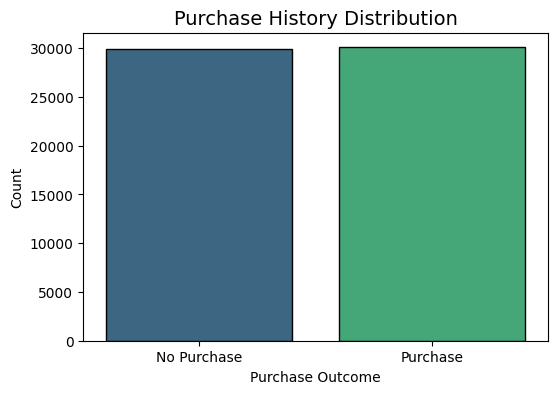

In [297]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='purchase_history', data=df, palette='viridis', edgecolor='black')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No Purchase', 'Purchase'])
plt.title('Purchase History Distribution', fontsize=14)
plt.xlabel('Purchase Outcome')
plt.ylabel('Count')
plt.show()

- The dataset has a balanced distribution of purchase outcomes

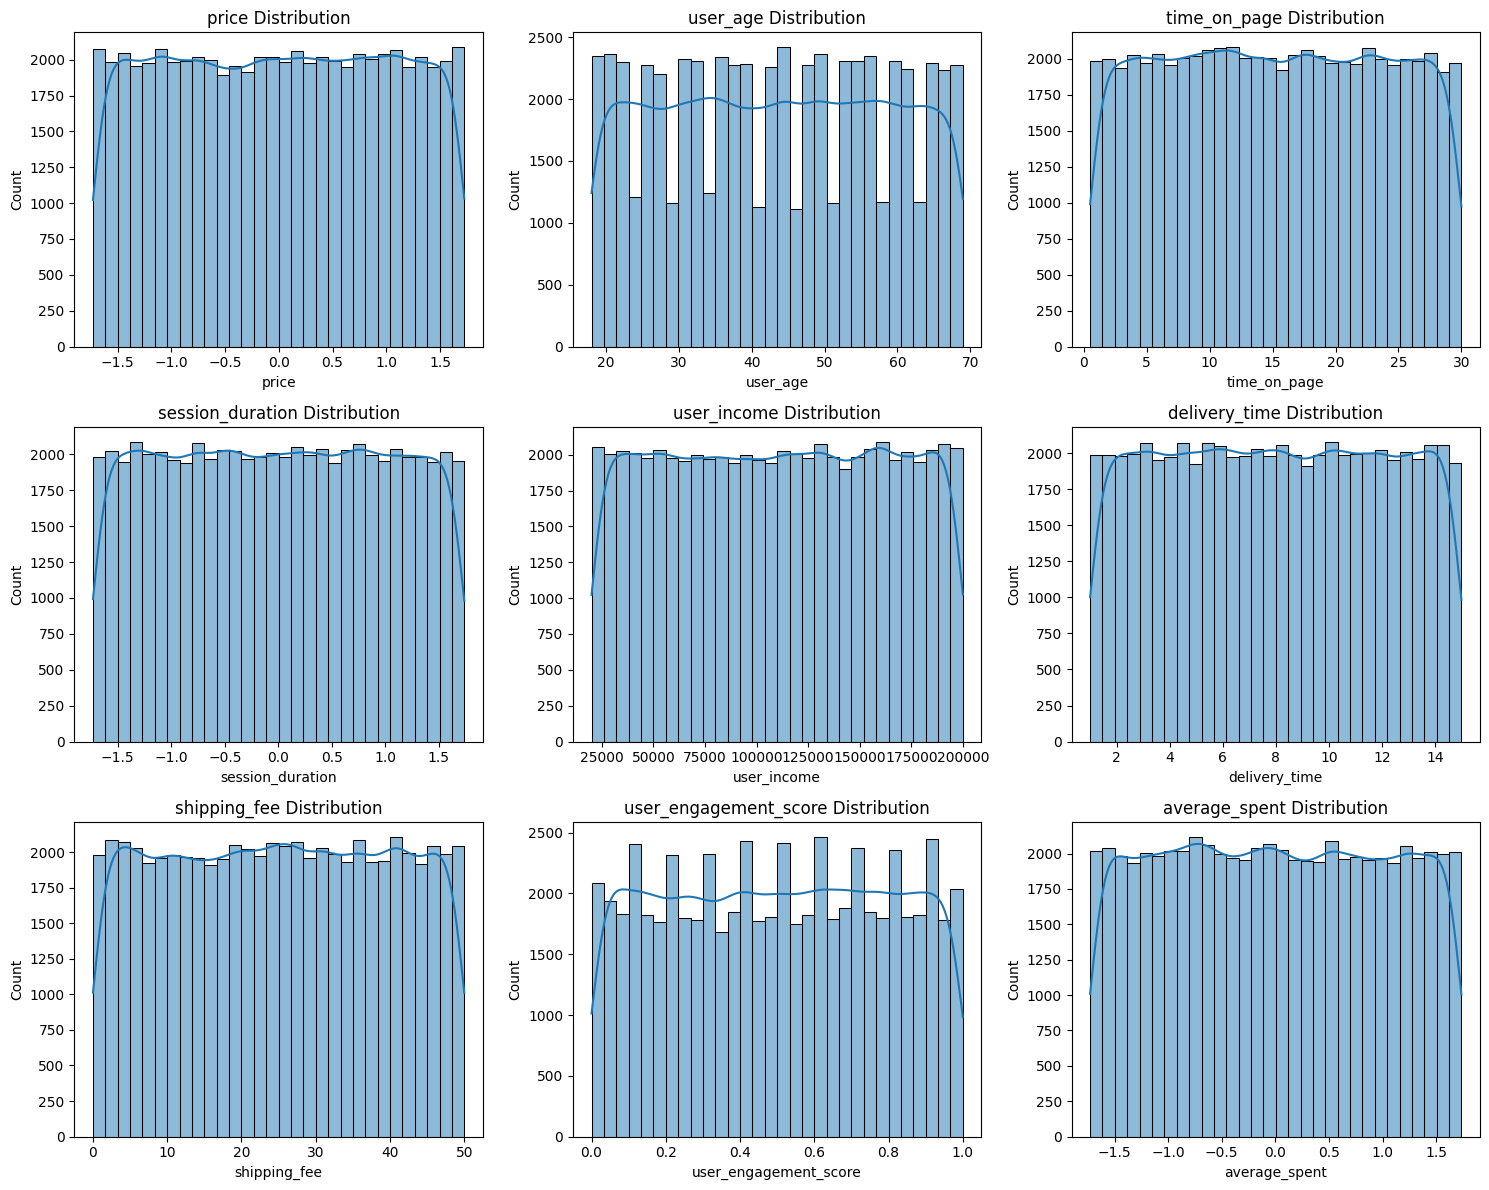

In [298]:
# Understanding the distribution of numerical features
num_features = df1[['price', 'user_age', 'time_on_page','session_duration', 'user_income', 'delivery_time', 'shipping_fee','user_engagement_score','average_spent']]
plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

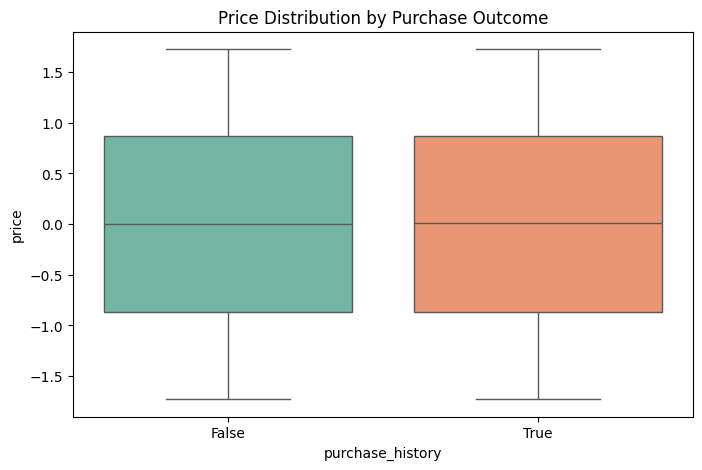

In [299]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='purchase_history', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Purchase Outcome')
plt.show()

- Based on the box plot, price does not appear to have a significant impact on purchase behavior. The distributions for both 'Purchase' and 'No Purchase' groups are nearly identical in terms of median, spread, and range. This suggests that price alone may not be a key factor influencing purchase decisions in this dataset.

#### 1. Categorical Features vs Target

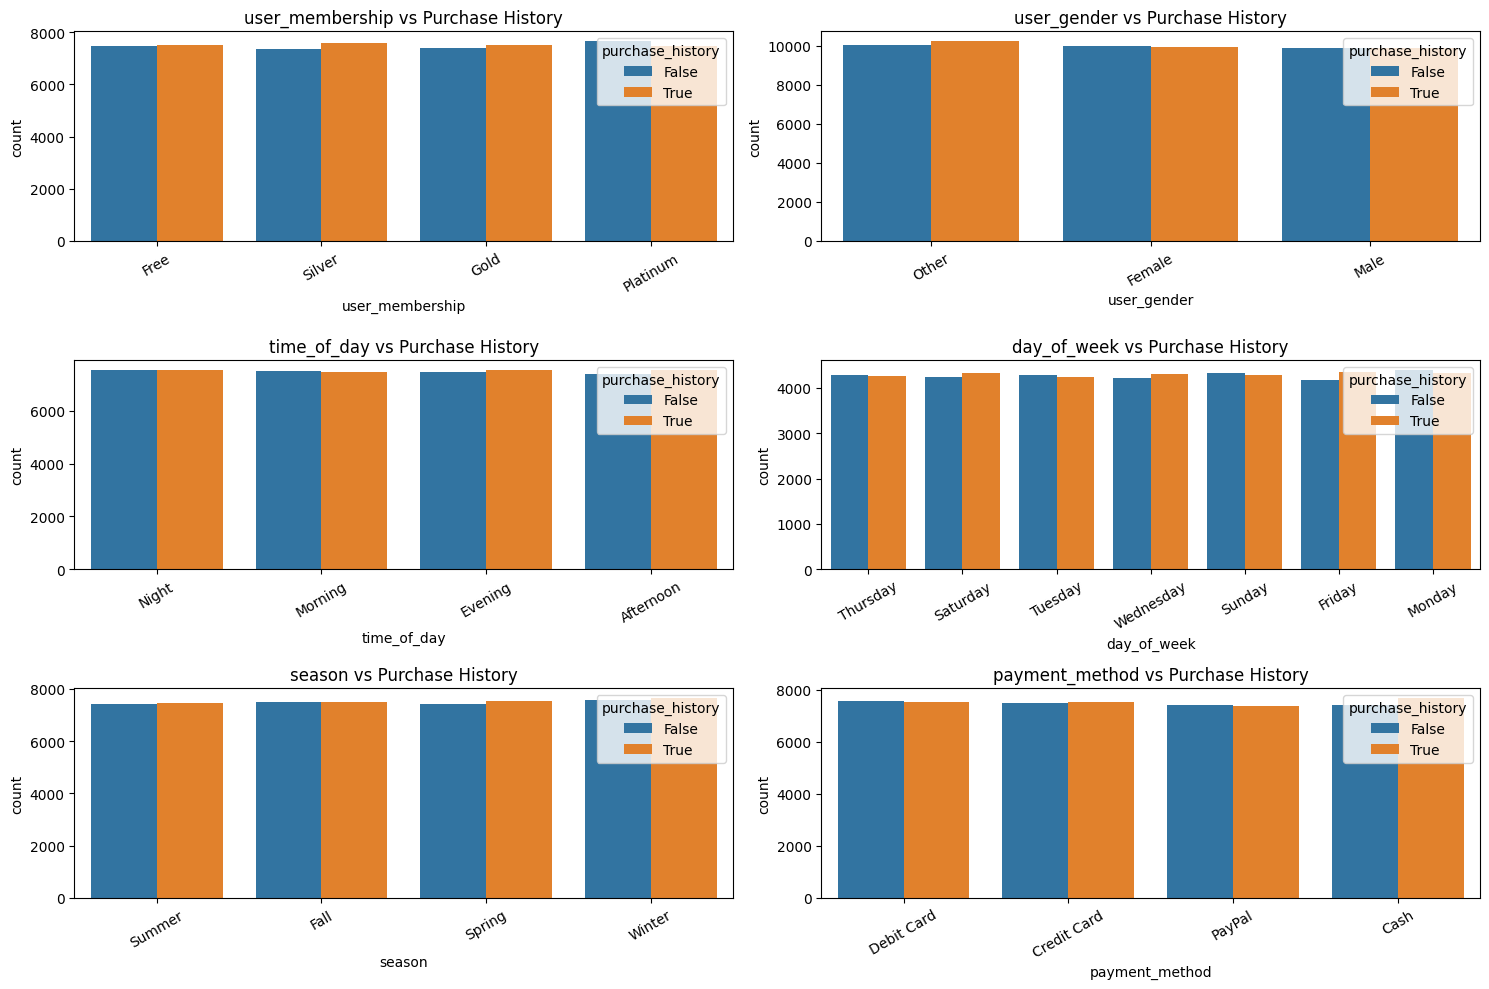

In [300]:
categorical_features = ['user_membership', 'user_gender', 'time_of_day','day_of_week', 'season', 'payment_method']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, hue='purchase_history', data=df1)
    plt.title(f'{feature} vs Purchase History')
    plt.xticks(rotation=30)
    
plt.tight_layout()
plt.show()

The distribution across all these features suggests that none of them have a strong, direct influence on purchase behavior individually

#### 2. Numerical features vs Target

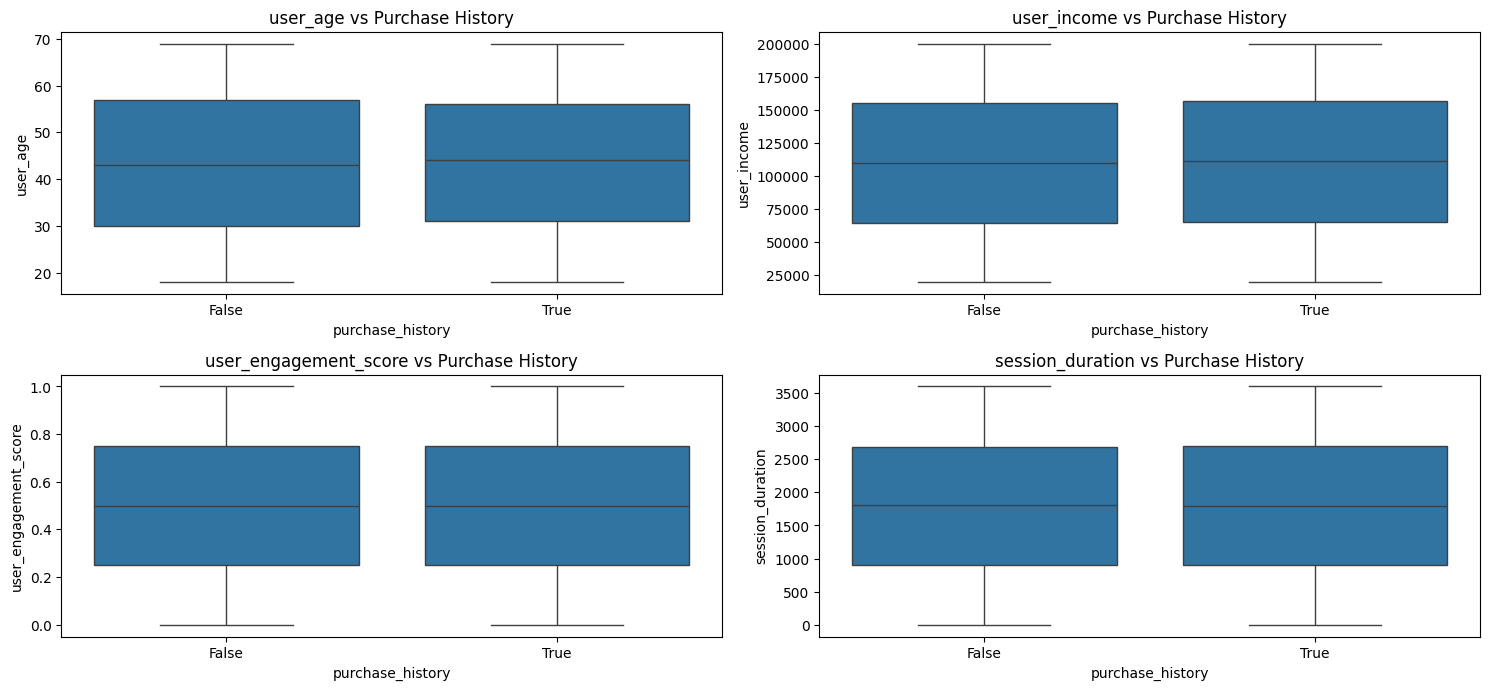

In [301]:
numerical_features = df[[ 'user_age', 'user_income','user_engagement_score', 'session_duration']]
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='purchase_history', y=feature, data=df1)
    plt.title(f'{feature} vs Purchase History')
    
plt.tight_layout()
plt.show()

Among the metrics, user engagement score and session duration show some influence on purchase history, indicating that more engaged users with longer session times are more likely to make purchases. Age and income appear to have little impact individually.

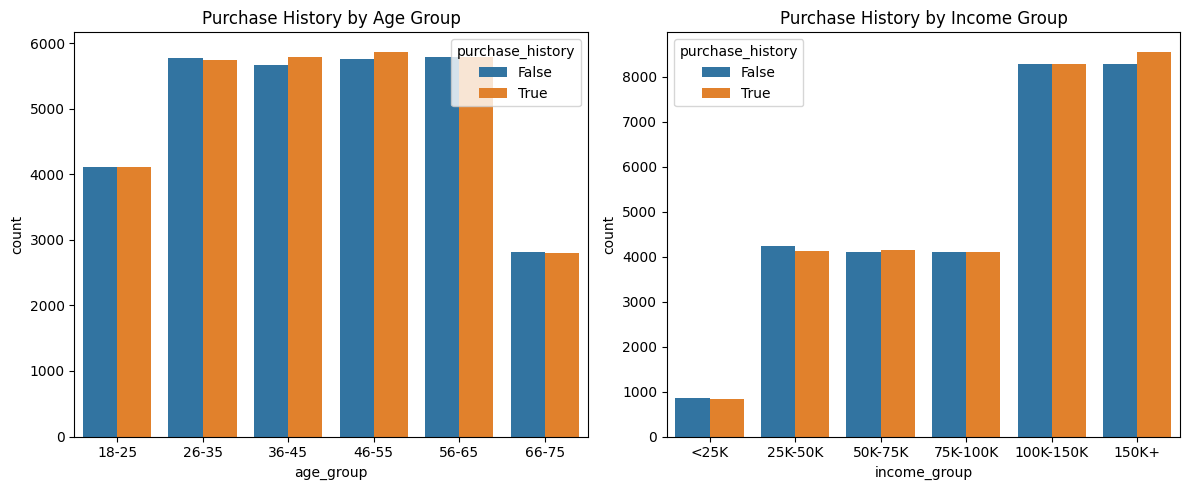

In [302]:
# Binning 'user_age' into categories
age_bins = [18, 25, 35, 45, 55, 65, 75]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75']
df1['age_group'] = pd.cut(df1['user_age'], bins=age_bins, labels=age_labels, right=False)

# Binning 'user_income' into categories
income_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
income_labels = ['<25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K+']
df1['income_group'] = pd.cut(df1['user_income'], bins=income_bins, labels=income_labels, right=False)

# Visualizing Purchase History by Age Group and Income Group
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='age_group', hue='purchase_history', data=df1)
plt.title('Purchase History by Age Group')

plt.subplot(1, 2, 2)
sns.countplot(x='income_group', hue='purchase_history', data=df1)
plt.title('Purchase History by Income Group')

plt.tight_layout()
plt.show()

- This highlights that while age and income provide trends

In [303]:
df.shape

(60000, 52)

### Trend Analysis

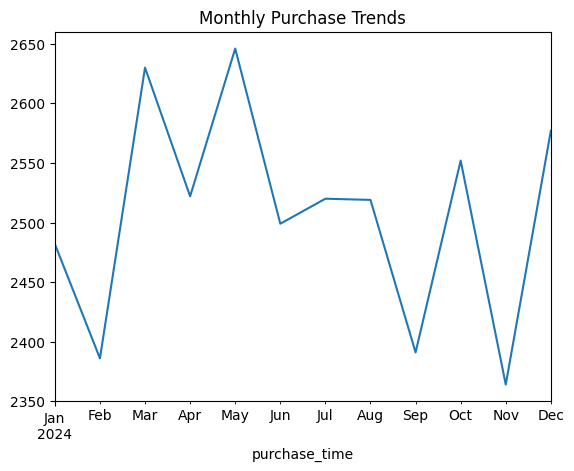

In [304]:
df1['purchase_time'] = pd.to_datetime(df1['purchase_time'])
df1.set_index('purchase_time').resample('M')['purchase_history'].sum().plot(kind='line')
plt.title('Monthly Purchase Trends')
plt.show()

##### Peaks in Purchases:
- Notable spikes are observed in March, May, and December.
- These peaks might correspond to special promotions, seasonal trends, or holidays.
##### Slumps in Purchases:
- Purchase activity drops significantly in February, June, September, and November.
- These dips could indicate periods of lower customer engagement or absence of major sales.
##### Year-End Surge:
- A sharp increase in purchases is evident in December, aligning with year-end festivities or holiday shopping trends.
##### Consistency:
- Despite the ups and downs, there is a general pattern of purchases ranging between 2350 and 2650, showing a relatively stable customer base throughout the year.

In [305]:
corr_matrix = df.corr()

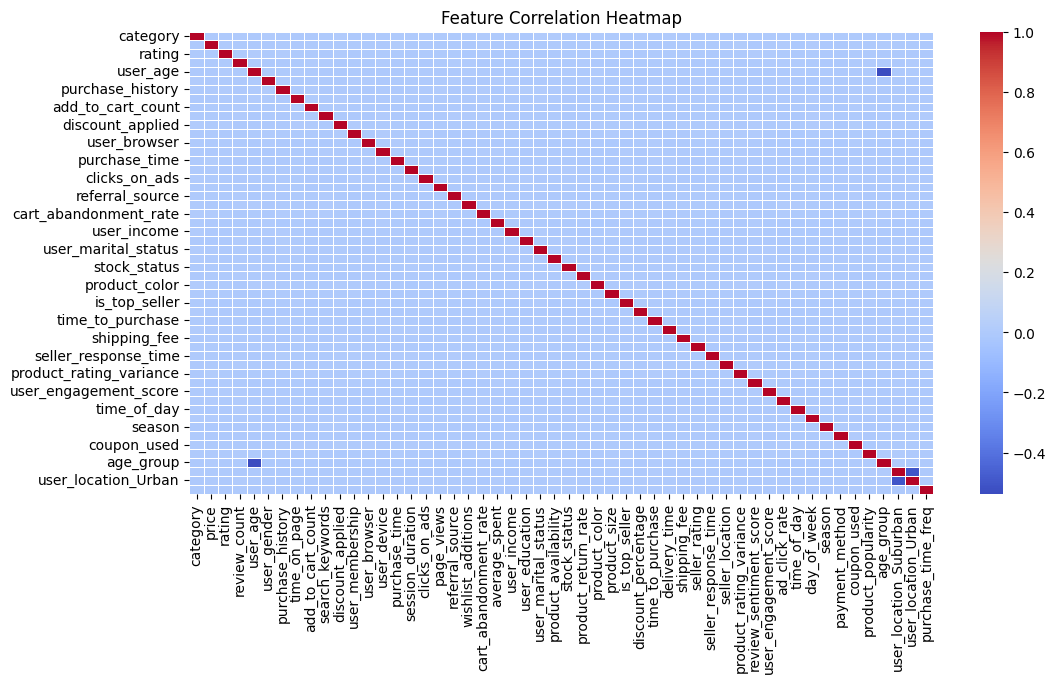

In [306]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

#### Summary of Correlation Heatmap
- Positive Correlations: Features like age and income positively linked to purchase_history suggest that older or higher-income users are more likely to purchase.
- Negative Correlations: Features like return_rate may negatively impact purchases, indicating that higher return rates deter buying behavior.
- Weak Correlations: Variables with correlations near zero (e.g., user_gender) may have minimal influence on purchasing decisions.
- Feature Interactions: Strong correlations between age, income, and purchase_history may highlight specific buyer groups (e.g., high-income professionals).
- Actionable Insights: Features like session_duration and product_rating with positive correlations suggest improving user experience and emphasizing top-rated products can boost sales.

## Checking Outliers

#####  Identifying outliers in multiple numerical columns using IQR

In [307]:
def identify_outliers(df):
    # Select numerical columns (float64, int64, int32)
    numerical_features = df.select_dtypes(include=['float64', 'int64', 'int32']).columns
    outlier_columns = []

    for column in numerical_features:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not outliers.empty:
            outlier_columns.append(column)
            print(f"Outliers detected in: '{column}'\n")

    if not outlier_columns:
        print("No outliers detected in the specified numerical columns.")

identify_outliers(df)


Outliers detected in: 'discount_percentage'

Outliers detected in: 'purchase_time_freq'



- Upon examining multiple numerical columns for outliers, the **discount_percentage and purchase_time_freq** columns were identified as having outliers. The next step is to apply an appropriate technique to handle them.

#### Boxplot Visualization of Discount Percentage and Purchase Time Frequency

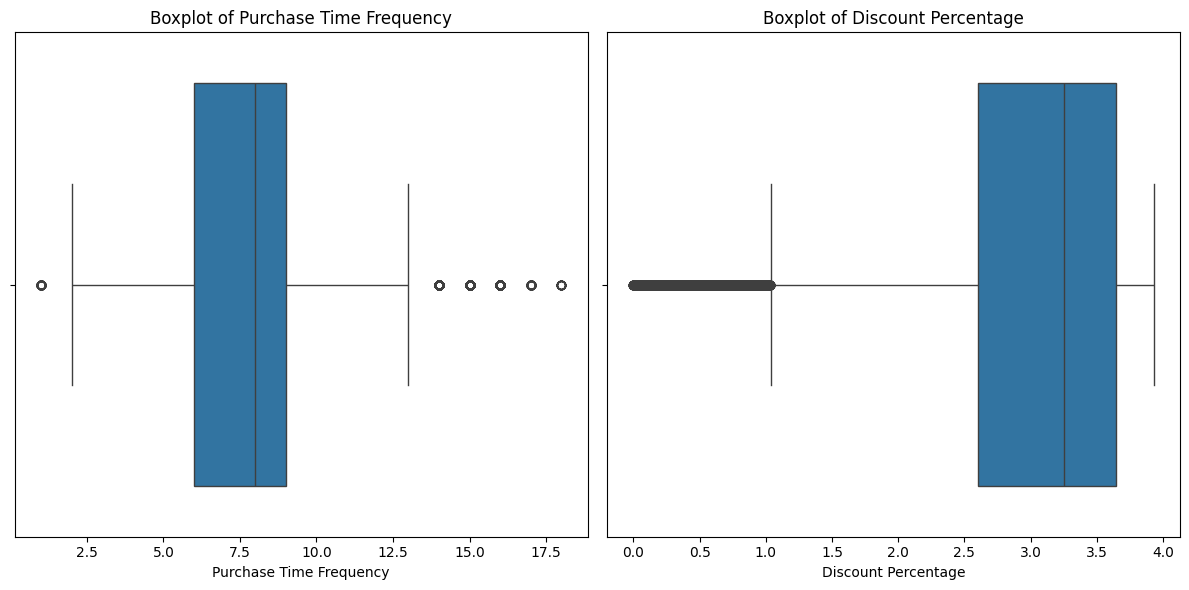

In [308]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['purchase_time_freq'])
plt.title('Boxplot of Purchase Time Frequency')
plt.xlabel('Purchase Time Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['discount_percentage'])
plt.title('Boxplot of Discount Percentage')
plt.xlabel('Discount Percentage')

plt.tight_layout() 
plt.show()


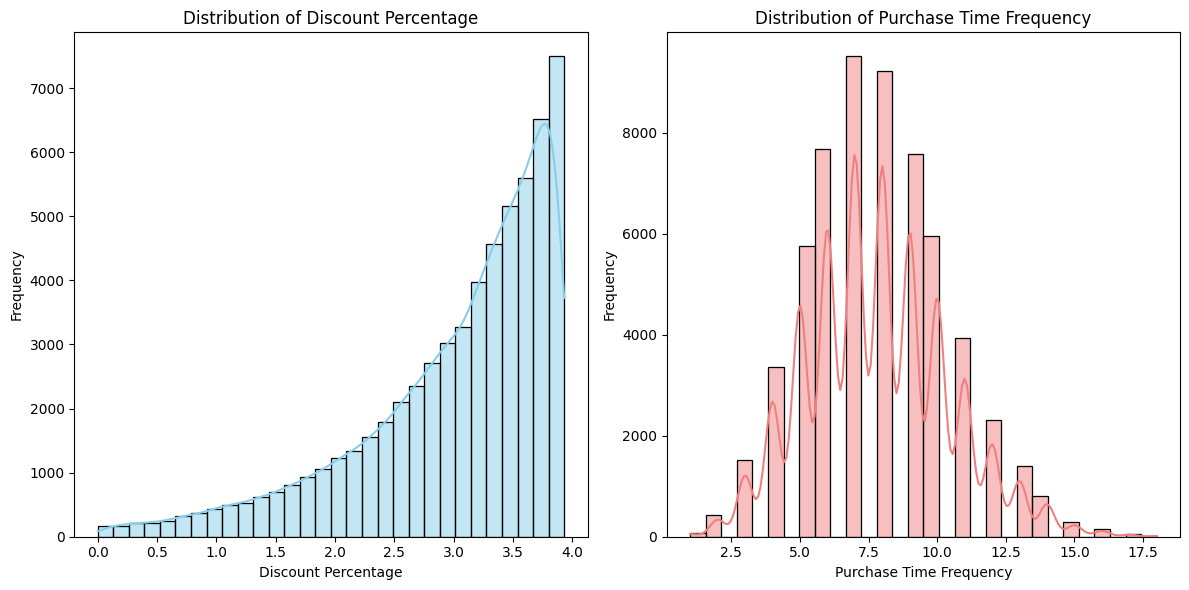

In [309]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['purchase_time_freq'], bins=30, kde=True, color='lightcoral')
plt.title('Distribution of Purchase Time Frequency')
plt.xlabel('Purchase Time Frequency')
plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

- Discount Percentage: The distribution appears right-skewed, with a concentration of values near the upper limit. The two peaks at the extremes suggest possible outliers or special discount patterns.
- Purchase Time Frequency: This distribution is closer to a normal distribution, though slightly skewed, with most values clustered between 4 and 10.

#### Outlier Range for Purchase Time Frequency

In [310]:
Q1 = df['purchase_time_freq'].quantile(0.25)
Q3 = df['purchase_time_freq'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['purchase_time_freq'] < lower_bound) | (df['purchase_time_freq'] > upper_bound)]
print(f"Outliers are below {lower_bound:.2f} and above {upper_bound:.2f}")
print(f"Total Outliers in purchase_time_freq: {outliers.shape[0]}")

Outliers are below 1.50 and above 13.50
Total Outliers in purchase_time_freq: 1374


## Handling Outliers

**Discount_percentage**

In [311]:
#applying winsorization
df['discount_percentage'] = winsorize(df['discount_percentage'], limits=[0.05, 0.05]) 

**Purchase_time_frequency**

In [312]:
df['purchase_time_freq'] = winsorize(df['purchase_time_freq'], limits=[0.03, 0.03])

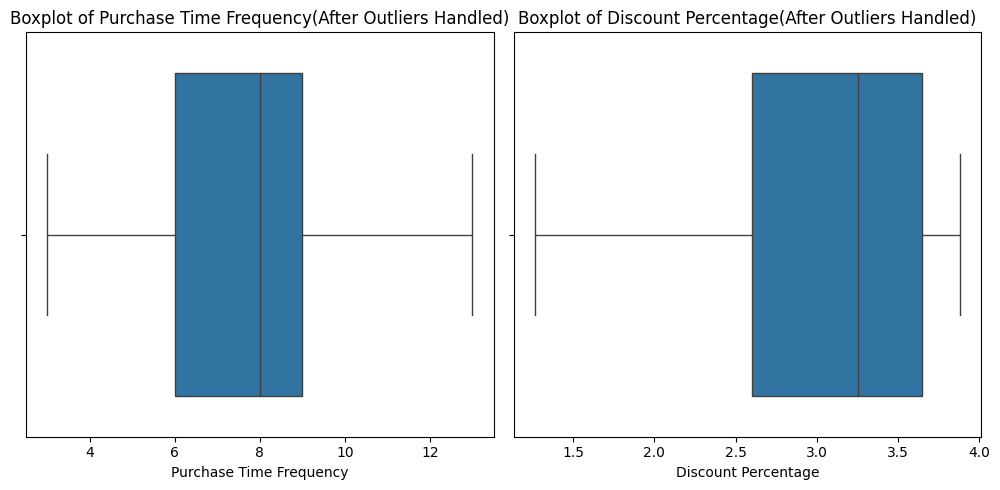

In [313]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['purchase_time_freq'])
plt.title('Boxplot of Purchase Time Frequency(After Outliers Handled)')
plt.xlabel('Purchase Time Frequency')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['discount_percentage'])
plt.title('Boxplot of Discount Percentage(After Outliers Handled)')
plt.xlabel('Discount Percentage')

plt.tight_layout() 
plt.show()


### Feature Selection Using Random Forest Feature Importance

In [314]:
X = df.drop(columns=['purchase_history']) 
y = df['purchase_history'] 

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Show top 10 features
print("Top 10 Important Features:\n", importances.head(10))
print("\nDropping features with importance < 0.01")

# Drop low-importance features (threshold = 0.01)
low_impact_cols = importances[importances < 0.01].index
df.drop(columns=low_impact_cols, inplace=True)
print("Dropped low-impact features:", low_impact_cols)

Top 10 Important Features:
 purchase_time           0.035085
session_duration        0.034731
time_to_purchase        0.034635
user_income             0.034633
price                   0.034459
time_on_page            0.034456
seller_response_time    0.034439
average_spent           0.034355
delivery_time           0.034332
shipping_fee            0.034311
dtype: float64

Dropping features with importance < 0.01
Dropped low-impact features: Index(['payment_method', 'user_membership', 'user_education', 'age_group',
       'stock_status', 'seller_location', 'product_availability',
       'product_size', 'user_device', 'user_gender', 'discount_applied',
       'coupon_used', 'is_top_seller', 'user_location_Urban',
       'user_location_Suburban'],
      dtype='object')


#### Train-Test Split for Model Training

In [315]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['purchase_history'])  # Features
y = df['purchase_history']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (48000, 36)
Testing Set Shape: (12000, 36)


#### Random Forest Classifier

In [316]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [317]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 


Accuracy: 0.4974166666666667
              precision    recall  f1-score   support

       False       0.49      0.52      0.51      5966
        True       0.50      0.47      0.49      6034

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



In [318]:
# Check class distribution
print(y_train.value_counts()) 

purchase_history
True     24054
False    23946
Name: count, dtype: int64


#### LogisticRegression

In [319]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))  

Accuracy: 0.501
              precision    recall  f1-score   support

       False       0.50      0.47      0.48      5966
        True       0.50      0.54      0.52      6034

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000



#### xgboost

In [320]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred)) 

Accuracy: 0.49666666666666665
              precision    recall  f1-score   support

       False       0.49      0.49      0.49      5966
        True       0.50      0.50      0.50      6034

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.50     12000
weighted avg       0.50      0.50      0.50     12000

